## Análise de fraudes nos carões de crédito

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix

In [2]:
def null_values(df): # função para valores nulos 
    null_values=pd.DataFrame({  "Null Values":df.isnull().sum() } )
    null_values=null_values.reset_index()
    print(null_values)

# link para baixar e carregar no google colab 
https://drive.google.com/file/d/1gk97US1QukR_klU_IFUhHXMouFTnll2s/view?usp=share_link

In [3]:
df=pd.read_csv("/content/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
rows=df.shape[0]
cols=df.shape[1]
print(f"rows are {rows} , columns are {cols}" )

rows are 284807 , columns are 31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print('Normal Transactions:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Transaction:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
# conjunto de dados está desequilíbrio

Normal Transactions: 99.83 % of the dataset
Fraud Transaction: 0.17 % of the dataset


In [8]:
df['Time'] = df['Time'].apply(lambda sec: (sec/3600)) # para obter horas
df['hour'] = df['Time'] % 24   # para obter horas
df['hour'] = df['hour'].apply(lambda x: math.floor(x))
df['day'] = df['Time']/24   # 2 dias de dados

df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x)) 

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1


In [10]:
null_values(df) 


     index  Null Values
0     Time            0
1       V1            0
2       V2            0
3       V3            0
4       V4            0
5       V5            0
6       V6            0
7       V7            0
8       V8            0
9       V9            0
10     V10            0
11     V11            0
12     V12            0
13     V13            0
14     V14            0
15     V15            0
16     V16            0
17     V17            0
18     V18            0
19     V19            0
20     V20            0
21     V21            0
22     V22            0
23     V23            0
24     V24            0
25     V25            0
26     V26            0
27     V27            0
28     V28            0
29  Amount            0
30   Class            0
31    hour            0
32     day            0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,26.337183,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,14.046470,1.491631
std,13.191152,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,0.499931
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,1.000000
25%,15.055972,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,1.000000
50%,23.525556,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,1.000000
75%,38.700139,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,2.000000
max,47.997778,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,2.000000


In [12]:
 cate_columns = df.select_dtypes(include=['category','object']) # extrair características categóricas
 

In [13]:
numeric_columns = df.select_dtypes(include=['int','float']) # extrair características numéricas
numeric_columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23,2
284803,47.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23,2
284804,47.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23,2
284805,47.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23,2


In [14]:
# conta 0s e 1s
ca1 = df['Class'].value_counts() 
print(f"Fraud Transactions are  {ca1[0]}")
print(f"Normal Transactions are  {ca1[1]}")

Fraud Transactions are  284315
Normal Transactions are  492


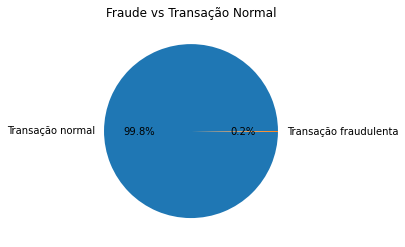

In [15]:
 
ca1 = ca1.set_axis(['Transação normal','Transação fraudulenta'], axis="index")

ca1.plot(kind = 'pie' ,autopct='%.1f%%')
plt.axis('off') 
plt.title("Fraude vs Transação Normal")
plt.show()

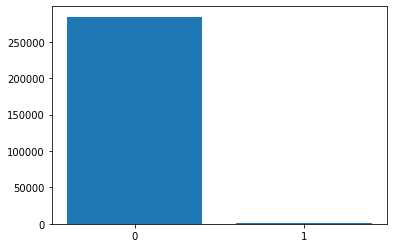

In [16]:
b=[]
for a in df['Class'].value_counts():
    b.append(a)
col=[0,1]
plt.bar(x=col, height=b) 
plt.xticks(ticks=[0,1], label=[])  
plt.show()
 


In [17]:
a=df.groupby("Class")["Amount"].sum()   
 
print(f"Fraud Transactions Amount :  {a[1]} Million")
print(f"Normal Transactions Amount:  {a[0]} Million")

Fraud Transactions Amount :  60127.97 Million
Normal Transactions Amount:  25102462.04 Million


# EDA

##   Histograma

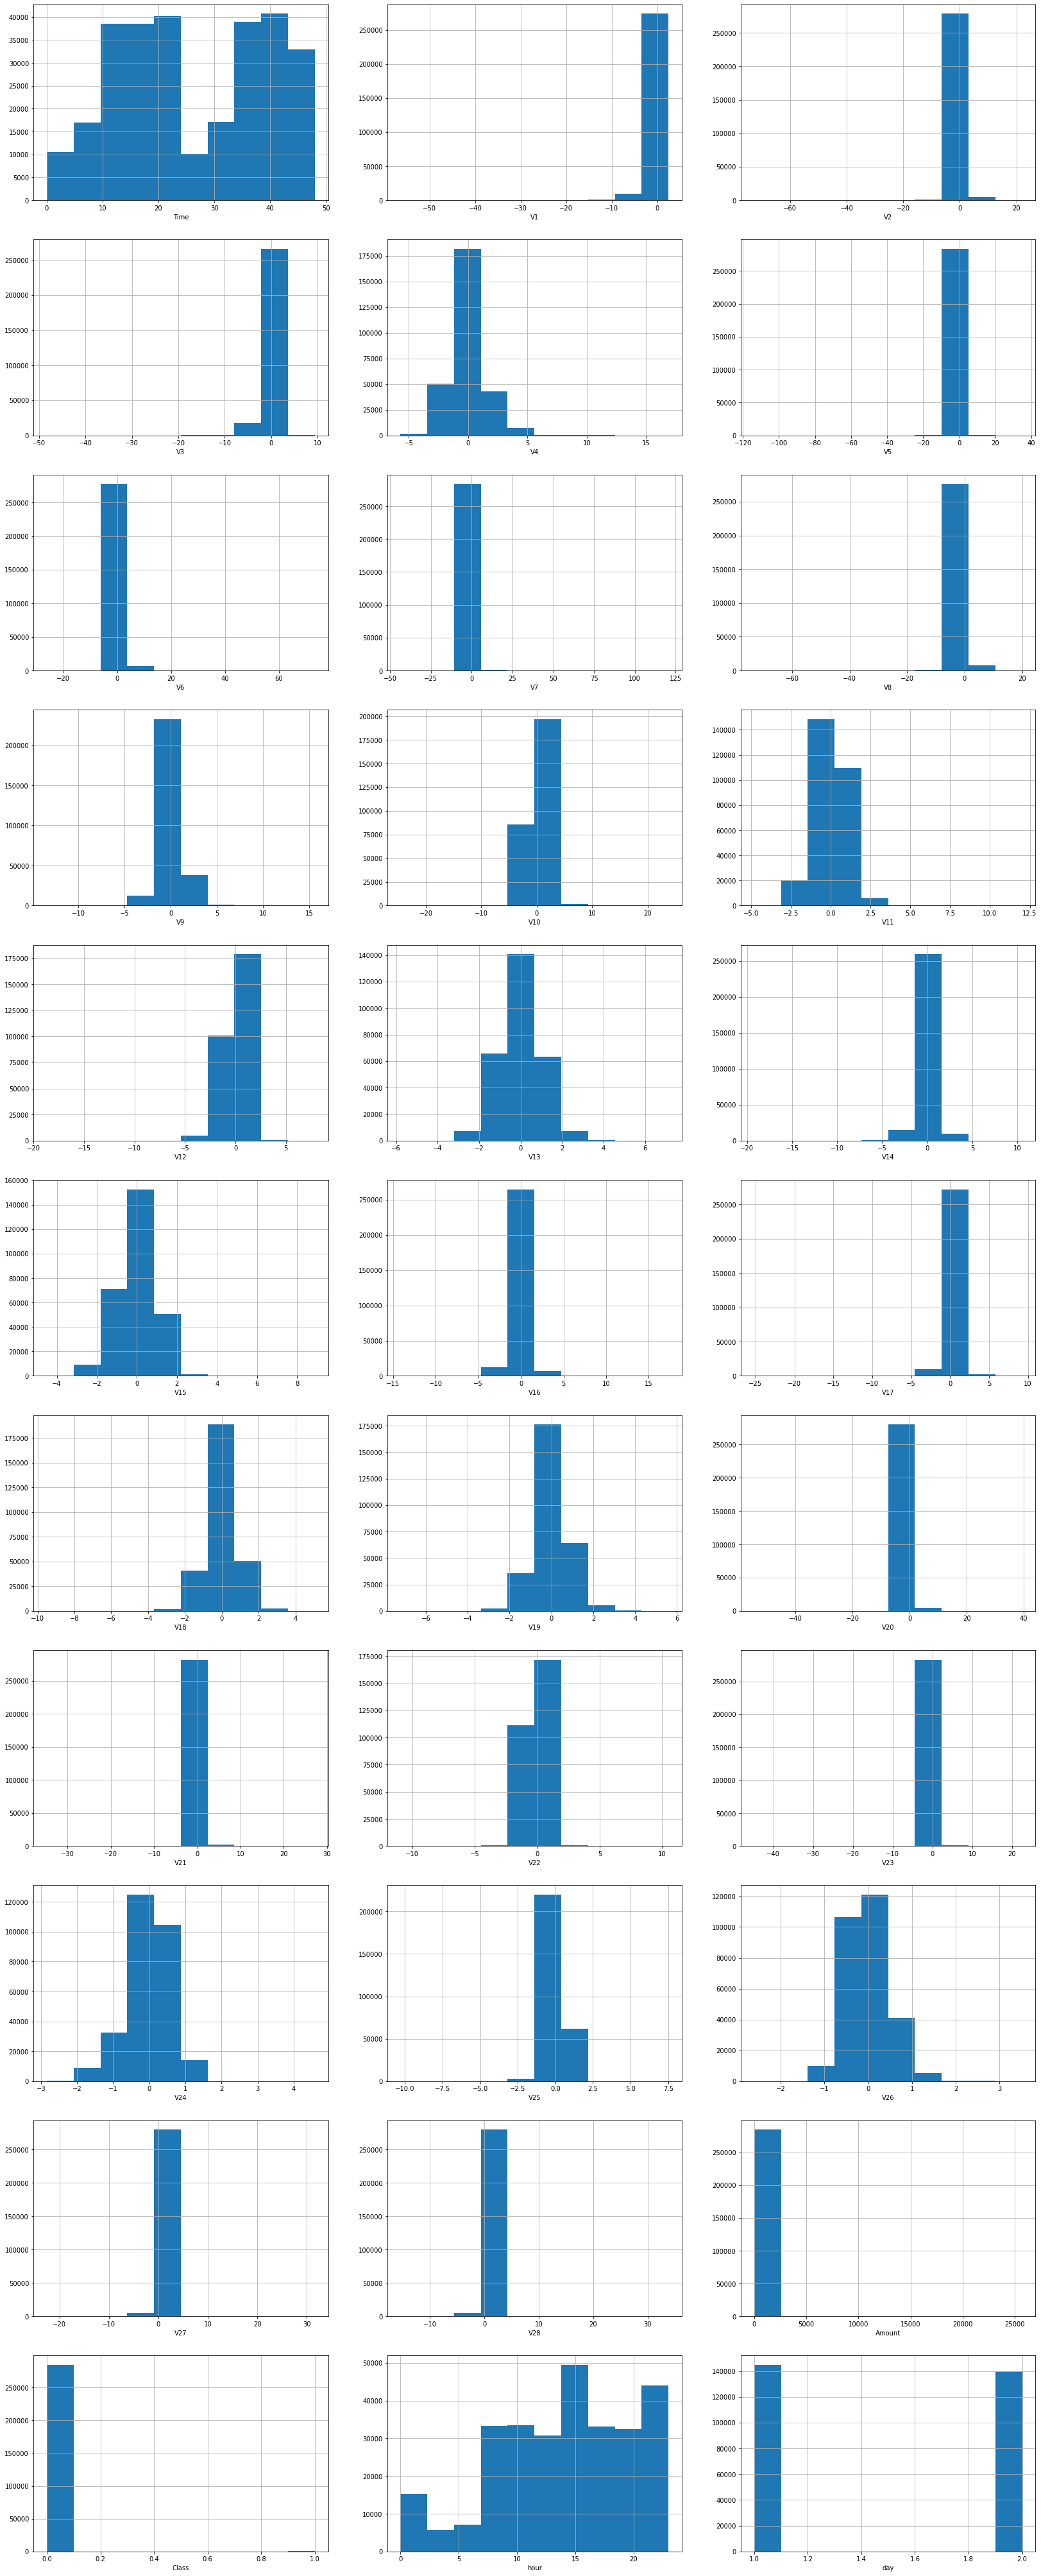

In [18]:
#  histograma para ver a distribuição dos dados
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(15,3,plotnumber)  # subparcelas para cobrir 3 parcelas em cada linha
    df[i].hist() 
# nome do rótulo do recurso    
    plt.xlabel(i ) 
# local para colocar o gráfico de cada recurso 
    plotnumber+=1 
plt.show() 
 

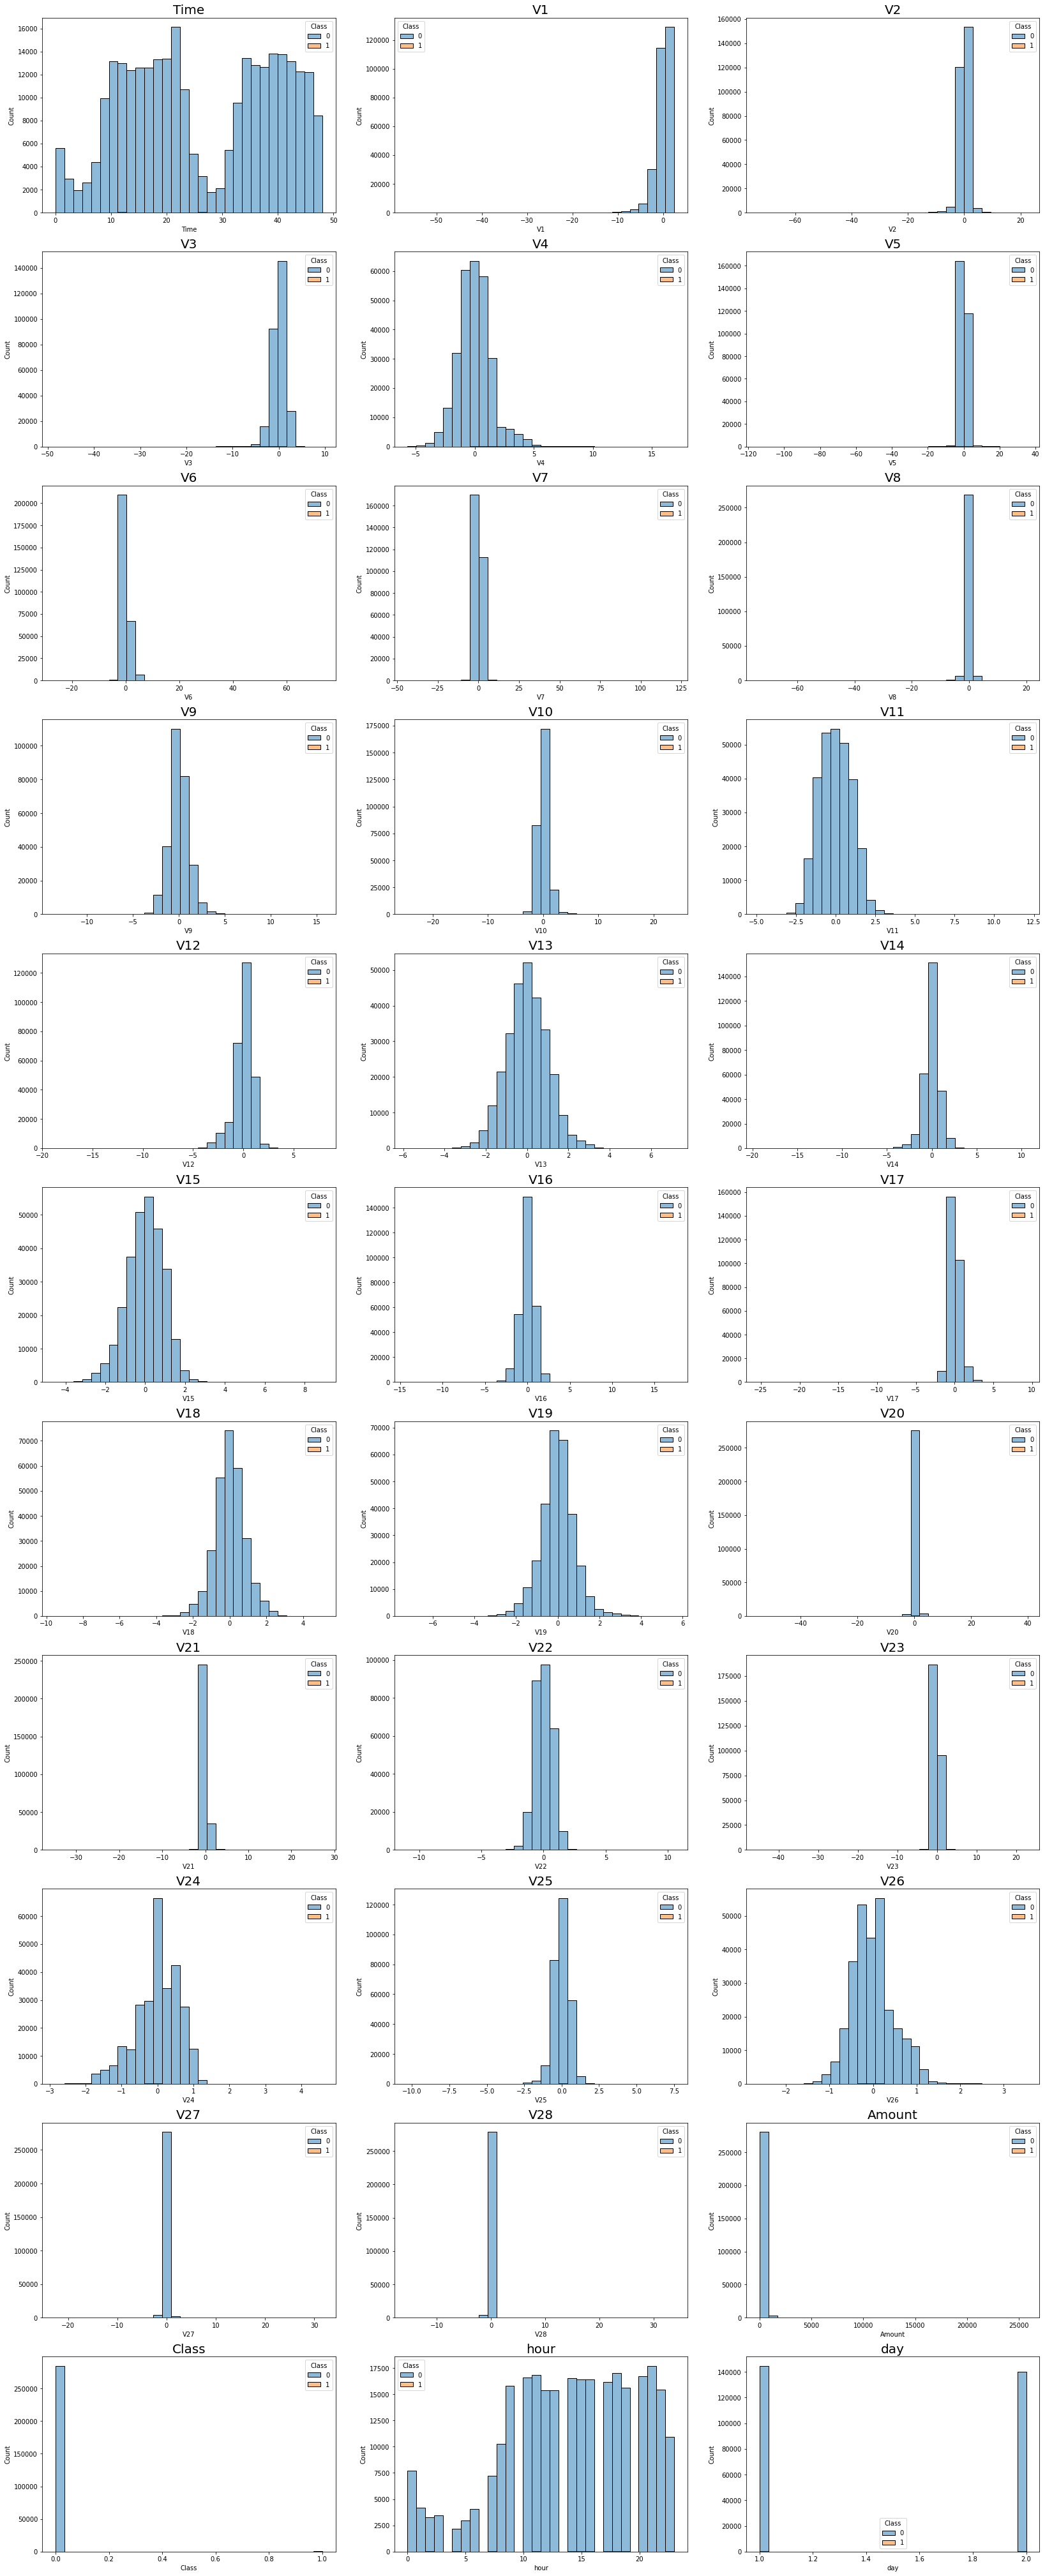

In [19]:
#  histograma para plotar 0s e 1s
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(15,3,plotnumber) # subparcelas para cobrir 3 parcelas em cada linha
    sns.histplot( data=df,x= i ,bins=30,hue=df['Class']) 
    
    plt.title(i,size=20)
    plotnumber+=1
plt.show() 
 

## Distplot


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

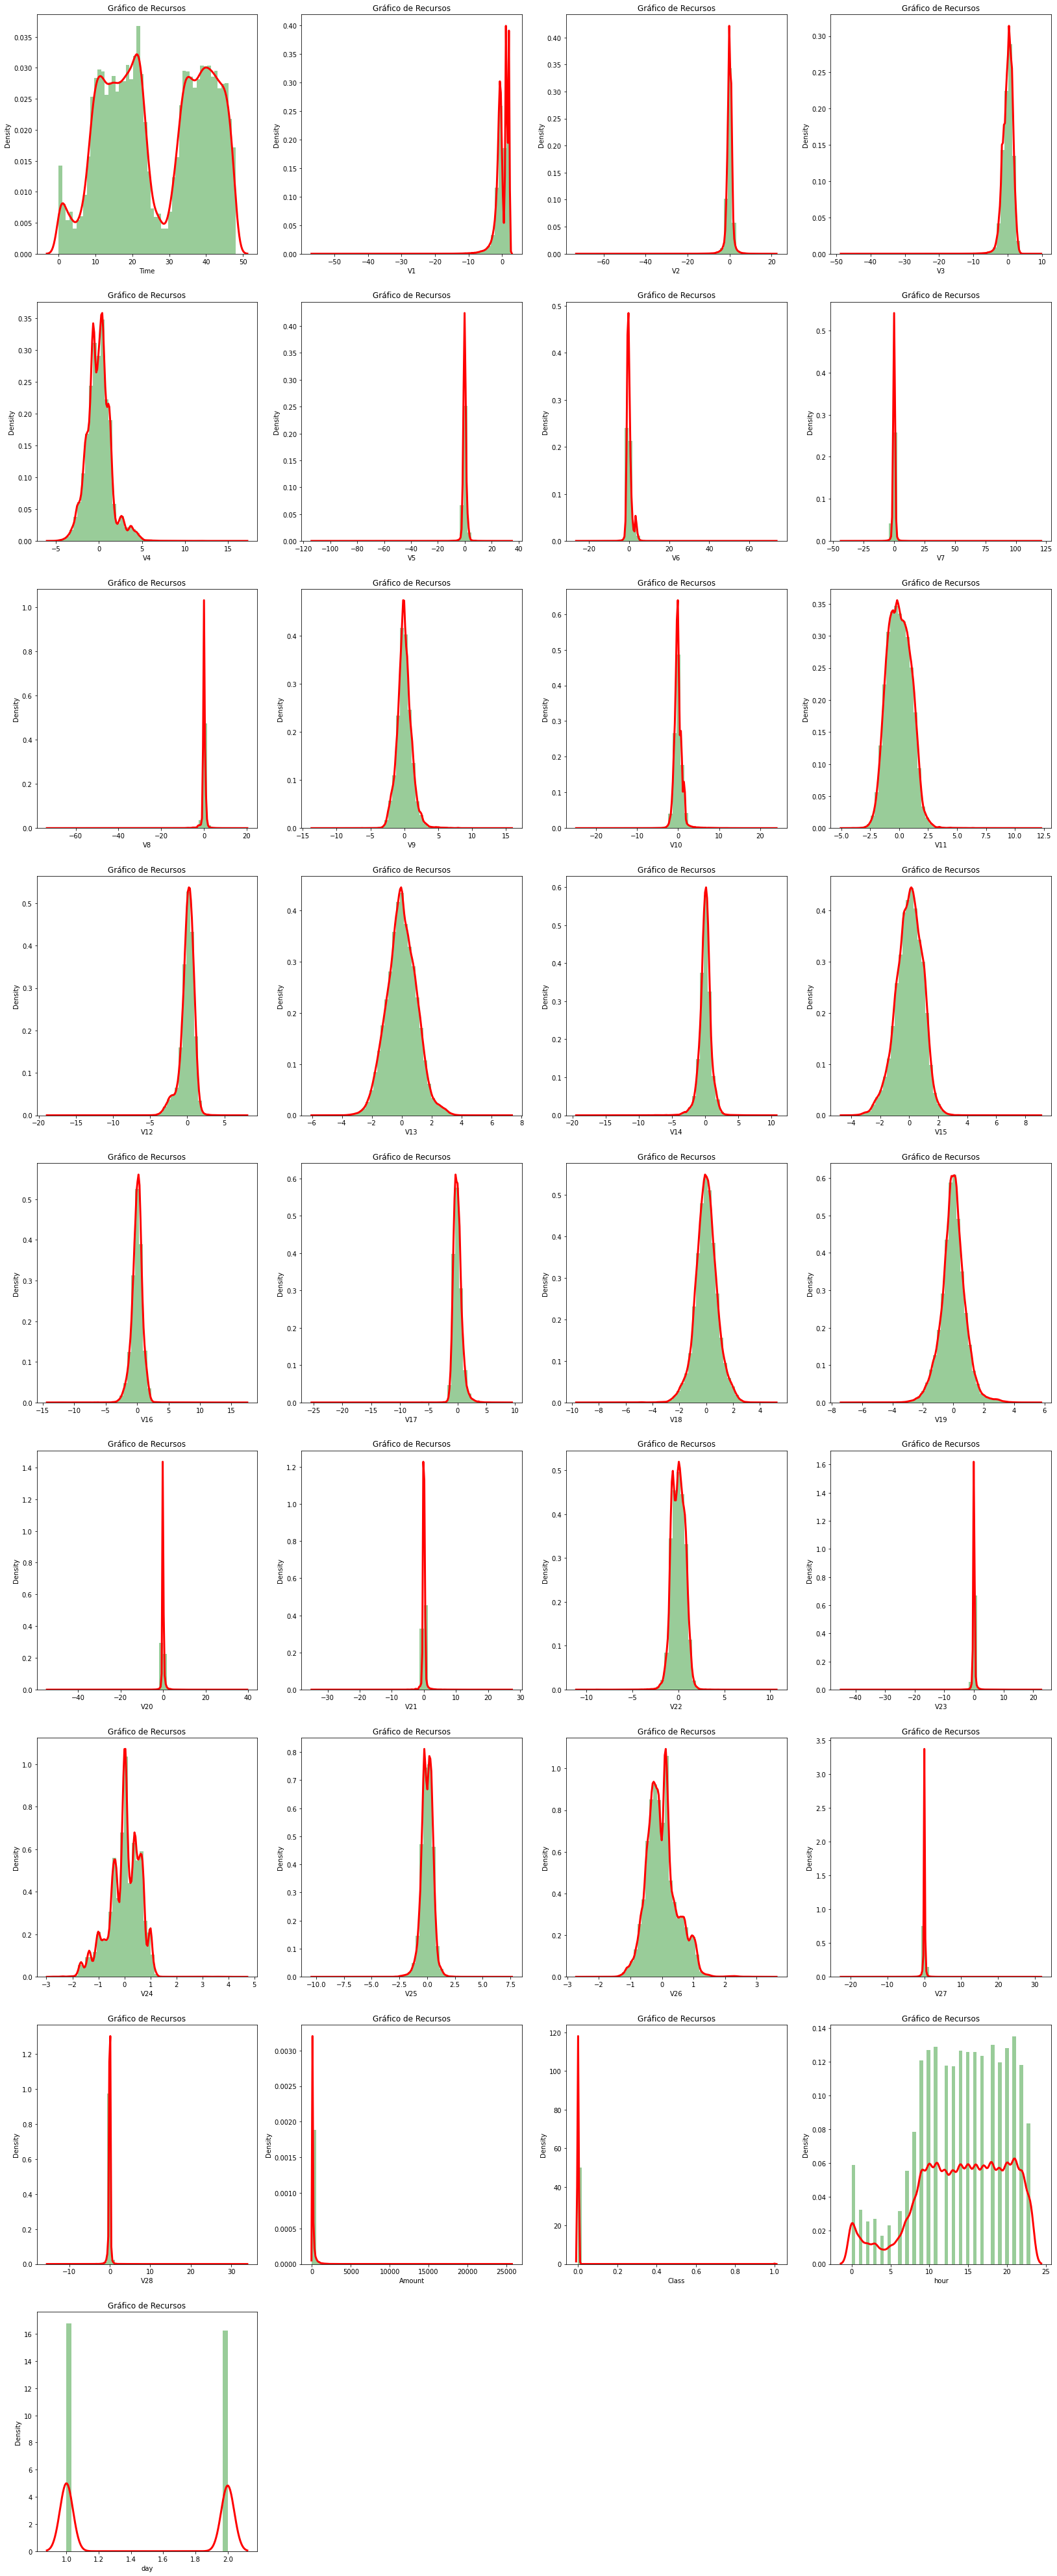

In [20]:
#  distplot
plt.figure(figsize=(28,80))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(10,4,plotnumber)   # subparcelas para cobrir 4 parcelas em cada linha
    sns.distplot(x=df[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"})
    plt.title("Gráfico de Recursos")
    plt.xlabel(i)
 
    plotnumber+=1 
plt.show()

## 

## Box plot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

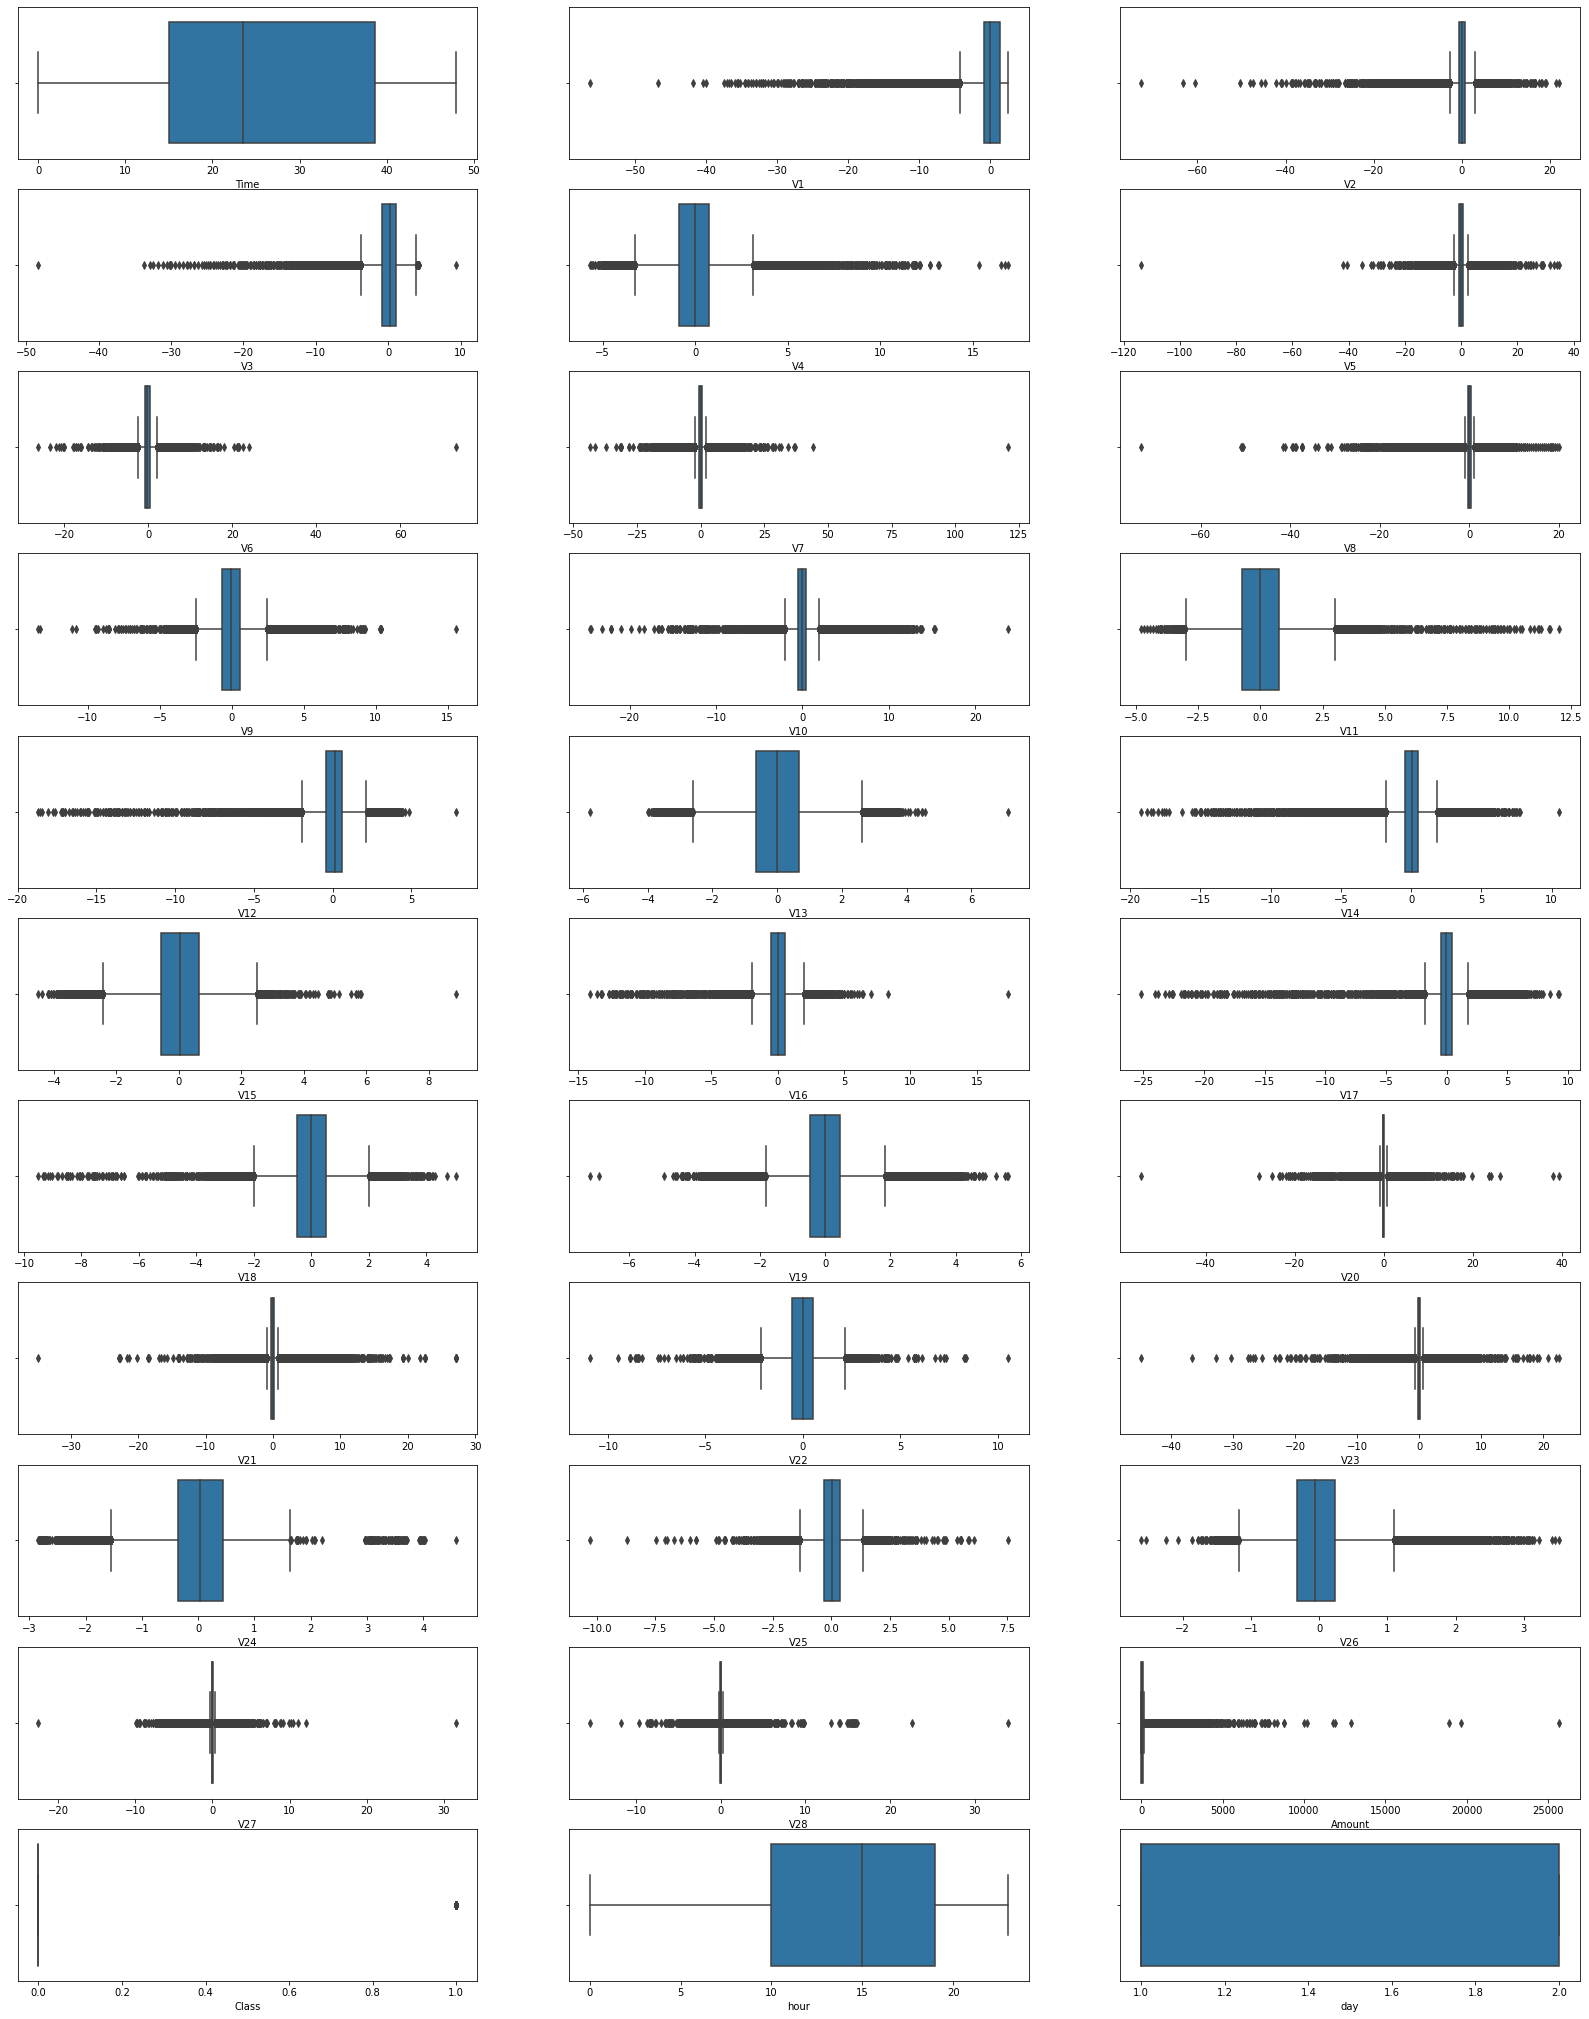

In [21]:
# plota boxplot para visualizar outliers
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(30,3,plotnumber) # subparcelas para cobrir 3 parcelas em cada linha
    sns.boxplot(df[i])
 
    plt.xlabel(i) 
 
    plotnumber+=1 
plt.show() 

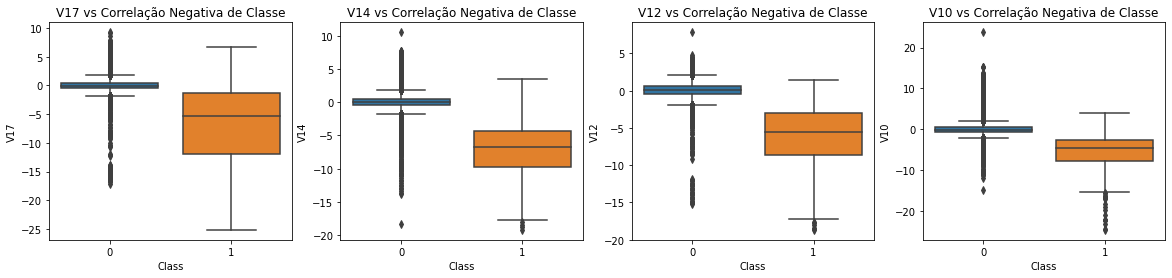

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, ax=axes[0])
axes[0].set_title('V17 vs Correlação Negativa de Classe')

sns.boxplot(x="Class", y="V14", data=df, ax=axes[1])
axes[1].set_title('V14 vs Correlação Negativa de Classe')

sns.boxplot(x="Class", y="V12", data=df, ax=axes[2])
axes[2].set_title('V12 vs Correlação Negativa de Classe')

sns.boxplot(x="Class", y="V10", data=df, ax=axes[3])
axes[3].set_title('V10 vs Correlação Negativa de Classe')

plt.show()

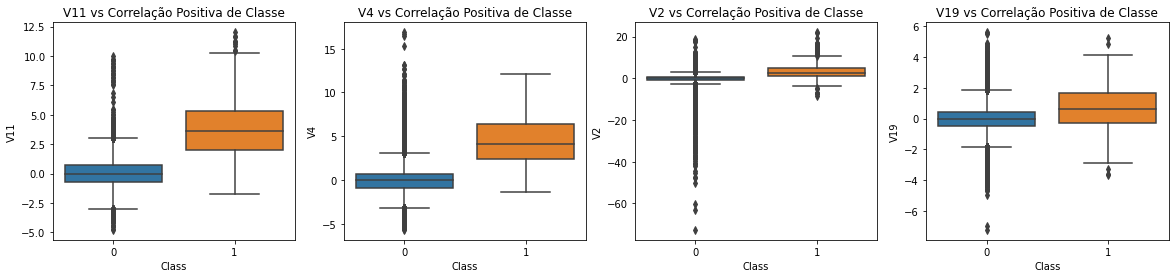

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=df, ax=axes[0])
axes[0].set_title('V11 vs Correlação Positiva de Classe')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Correlação Positiva de Classe')

sns.boxplot(x="Class", y="V2", data=df, ax=axes[2])
axes[2].set_title('V2 vs Correlação Positiva de Classe')

sns.boxplot(x="Class", y="V19", data=df, ax=axes[3])
axes[3].set_title('V19 vs Correlação Positiva de Classe')

plt.show()

## Tipo de transações

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


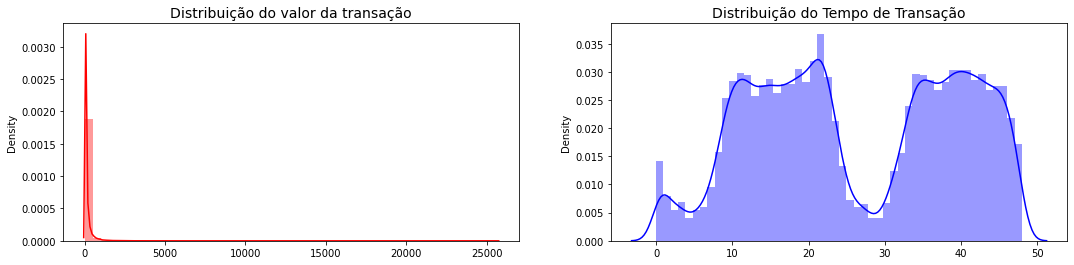

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values
# gráfico dist de Quantia
sns.distplot(amount_val, ax=ax[0], color='r') 
ax[0].set_title('Distribuição do valor da transação', fontsize=14)
# ax[0].set_xlim([min(amount_val), max(amount_val)])
# gráfico dist de tempo
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição do Tempo de Transação', fontsize=14) 
# ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


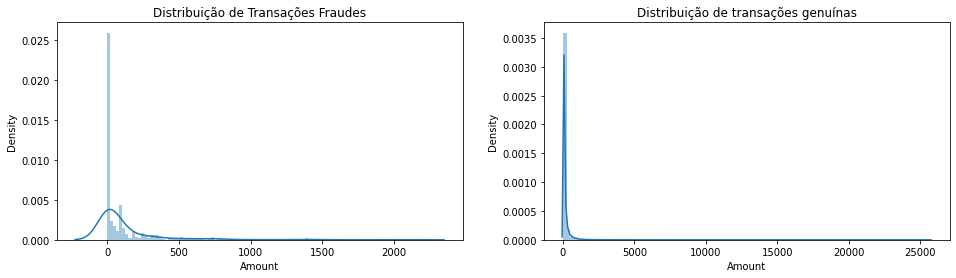

In [25]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
# plotar transação de fraude select da classe 1 e plotar seu valor
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0]) 
axs[0].set_title("Distribuição de Transações Fraudes")

# plotar transação de fraude select da classe 0 e plotar seu valor
sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1]) 
axs[1].set_title("Distribuição de transações genuínas")

plt.show()

In [68]:
print("Distribuição de transações fraudulentas : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head(10)) 
print("\n")
# quantidade máxima de fraude
print("Quantidade máxima de transação fraudulenta - ",df[(df['Class'] == 1)]['Amount'].max()) 
# quantidader mínimo de fraude
print("Quantidade mínima de transação fraudulenta - ",df[(df['Class'] == 1)]['Amount'].min()) 

Distribuição de transações fraudulentas : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
2.28       3
12.31      3
Name: Amount, dtype: int64


Quantidade máxima de transação fraudulenta -  2125.87
Quantidade mínima de transação fraudulenta -  0.0


In [27]:
print("Distribuição de transações genuínas : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head(10))
print("\n")
print("Quantidade máxima de transação genuína - ",df[(df['Class'] == 0)]['Amount'].max()) 
print("Quantidade miníma de transação genuína - ",df[(df['Class'] == 0)]['Amount'].min()) 

Distribuição de transações genuínas : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
0.76      2981
10.00     2950
1.29      2892
1.79      2622
0.99      2304
Name: Amount, dtype: int64


Quantidade máxima de transação genuína -  25691.16
Quantidade miníma de transação genuína -  0.0


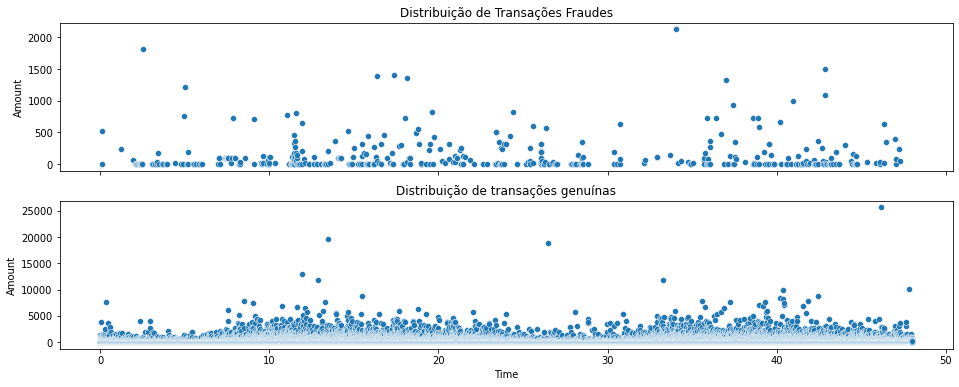

In [28]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))
# gráfico de dispersão de tempo e quantidade de classe 1, ou seja, valores de fraude
sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0]) 
axs[0].set_title("Distribuição de Transações Fraudes")
# gráfico de dispersão de tempo e quantidade de classe 0, ou seja, valores Gunuine
sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1]) 
axs[1].set_title("Distribuição de transações genuínas")

plt.show()

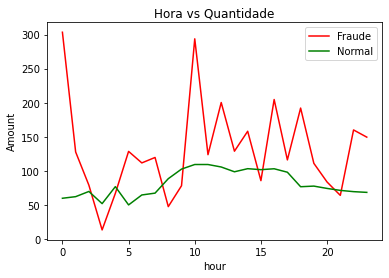

In [29]:
n=df[df['Class'] == 1] 
p=df[df['Class'] == 0]
f, ax = plt.subplots(1, 1)
ax=sns.lineplot(data=n,x="hour",y="Amount" ,color='red' ,label="Fraud",ci=None)
sns.lineplot(data=p,x="hour",y="Amount" ,color='green',  label="Normal",ax=ax,ci=None)
plt.legend(["Fraude","Normal"])
plt.title("Hora vs Quantidade")
plt.show()


## Correlação

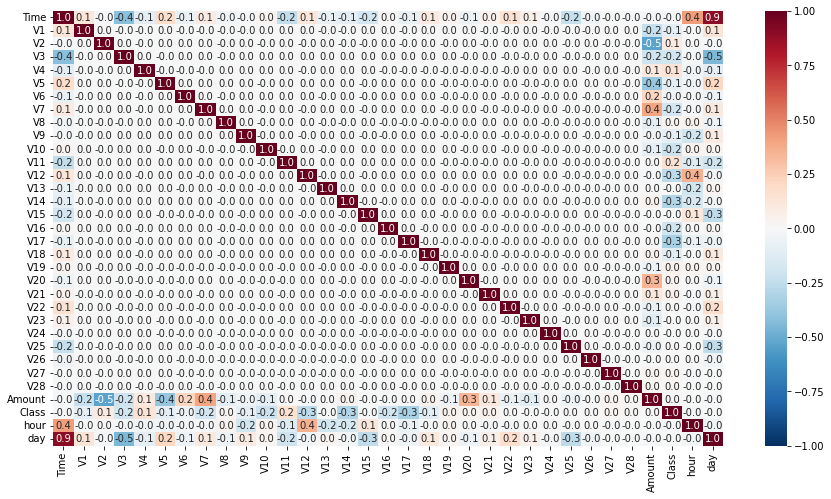

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1,fmt='.1f')
plt.show()

In [31]:
df[['Time','Amount','Class']].corr()['Class'].sort_values(ascending=False)  # correlation  value of time , amount and class

Class     1.000000
Amount    0.005632
Time     -0.012323
Name: Class, dtype: float64

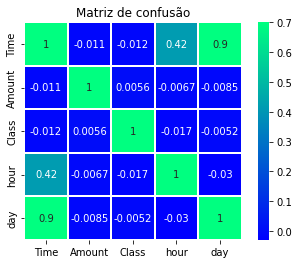

In [32]:
plt.title('Matriz de confusão')
# correlação de tempo, quantidade, aula, hora e dia
sns.heatmap(df[['Time','Amount','Class',"hour","day"]].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",  linecolor='w',annot=True);


In [33]:
#Correlação com a variável de saída
correlation=df.corr()
cor_target = abs(correlation["Class"])
#Seleção de recursos altamente correlacionados
relevant_features = cor_target[cor_target < 1]
relevant_features.sort_values(ascending=False)  

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
hour      0.017109
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
day       0.005223
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [34]:

relevant_features=relevant_features.sort_values(ascending=False).head(20)
columns= relevant_features.index  
z=df[columns]
y=df[['Class']] 

In [35]:
relevant_features

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
V1     0.101347
V9     0.097733
V5     0.094974
V2     0.091289
V6     0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
Name: Class, dtype: float64

# Criando o model de ML

In [36]:
xtr,xte,ytr,yte=train_test_split(z,y ,train_size=0.7) 

In [37]:
smt=SMOTE() 

In [38]:
# balancea o conjunto de dados em desequilíbrio
xtr,ytr=smt.fit_resample(xtr,ytr)

## Regressão Logística

In [39]:
lr=LogisticRegression() 
lr.fit(xtr,ytr)
ypred=lr.predict(xte)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     82678
           1       0.91      0.05      0.09      2765

    accuracy                           0.97     85443
   macro avg       0.94      0.52      0.54     85443
weighted avg       0.97      0.97      0.96     85443



<AxesSubplot:>

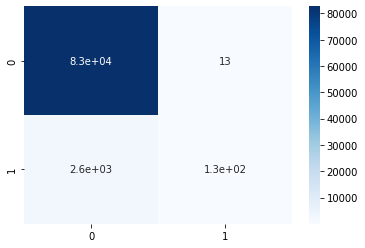

In [41]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

## KNN

In [42]:
knn=KNeighborsClassifier() 
knn.fit(xtr,ytr)
ypred=knn.predict(xte)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

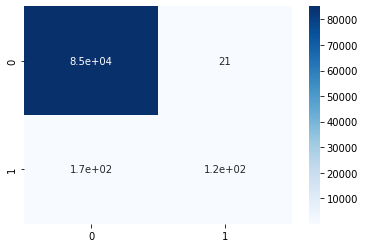

In [43]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

In [44]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85151
           1       0.85      0.42      0.56       292

    accuracy                           1.00     85443
   macro avg       0.93      0.71      0.78     85443
weighted avg       1.00      1.00      1.00     85443



## SVC 

In [45]:
sv=SVC()
sv.fit(xtr,ytr)
ypred=sv.predict(xte)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

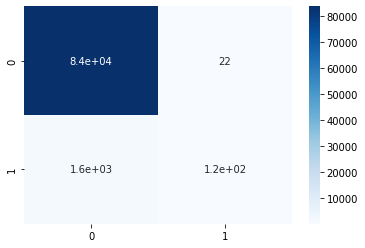

In [46]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

In [47]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83709
           1       0.85      0.07      0.13      1734

    accuracy                           0.98     85443
   macro avg       0.91      0.54      0.56     85443
weighted avg       0.98      0.98      0.97     85443



# Decicision Tree

In [48]:
DTC=DecisionTreeClassifier()

In [49]:
DTC.fit(xtr,ytr)

DecisionTreeClassifier()

In [50]:
ypred=DTC.predict(xte)

In [51]:
confusion_matrix(ypred,yte)

array([[85112,    31],
       [  187,   113]])

In [52]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85143
           1       0.78      0.38      0.51       300

    accuracy                           1.00     85443
   macro avg       0.89      0.69      0.75     85443
weighted avg       1.00      1.00      1.00     85443



## Random Forest

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(xtr,ytr)

<ipython-input-54-0e961e36c1ae>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)


RandomForestClassifier()

In [55]:
ypred=rf.predict(xte)

In [56]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.83      0.82      0.82       145

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

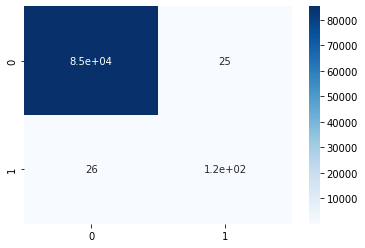

In [57]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

# AdaBoost

In [58]:
ad=AdaBoostClassifier()
ad.fit(xtr,ytr)
ypred=ad.predict(xte)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83552
           1       0.88      0.07      0.12      1891

    accuracy                           0.98     85443
   macro avg       0.93      0.53      0.56     85443
weighted avg       0.98      0.98      0.97     85443



<AxesSubplot:>

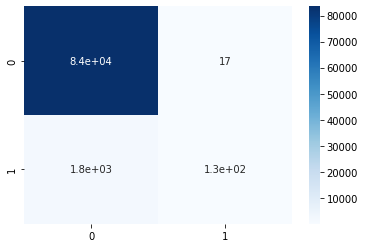

In [60]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

## O AS RF tem melhor desempenho entre outros, por isso o otimizamos

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# números de árvores no random forest
n_estimators = [5,20,50,100] 
# número de recursos em consideração em cada divisão
max_features = ['auto', 'sqrt']
# número máximo de níveis permitidos em cada árvore de decisão
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
# número mínimo de amostra para dividir um nó
min_samples_split = [2, 6, 10] 
# número mínimo de amostra que pode ser armazenado em um nó folha
min_samples_leaf = [1, 3, 4] 
# método usado para amostrar pontos de dados
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [63]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,  n_iter = 10, cv = 4, verbose=2, random_state=35, n_jobs = -1)

In [64]:
rf_random.fit(xtr, ytr)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [65]:
ypred1 =rf_random.predict(xte)

In [66]:
print(classification_report(ypred1,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.82      0.84      0.83       141

    accuracy                           1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

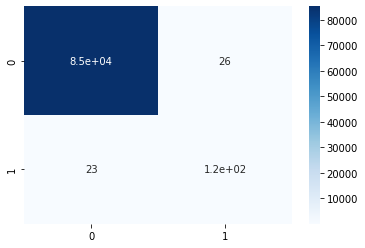

In [67]:
cf_matrix = confusion_matrix(ypred1, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')